In [2]:
#%%writefile descriptive.py


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from load_data import DataProcessor

class DescriptiveDetails:
    def __init__(self, cleaned_data):
        self.df = cleaned_data

    def extract_columns(self):
        confectionary_2022 = self.df['Confectionary Shopping Value 2022']
        confectionary_2023 = self.df['Confectionary Shopping Value 2023']
        coffee_2022 = self.df['Coffee Shopping Value 2022']
        coffee_2023 = self.df['Coffee Shopping Value 2023']
        
        plot_data = pd.DataFrame({
            'Confectionary 2022': confectionary_2022,
            'Confectionary 2023': confectionary_2023,
            'Coffee 2022': coffee_2022,
            'Coffee 2023': coffee_2023
        })
        return plot_data

    def create_long_form_data(self, plot_data):
        long_form_data = pd.melt(plot_data.reset_index(), id_vars=['index'], value_vars=plot_data.columns)
        long_form_data.columns = ['index', 'Category', 'Value']
        return long_form_data

    def annotate_statistics(self, category_data, category_index):
        median = category_data.median()
        mean = category_data.mean()
        quantiles = category_data.quantile([0.25, 0.75])
        
        plt.annotate(f'M: {median:.2f}', 
                     xy=(category_index, median), 
                     xytext=(10, 10), 
                     textcoords='offset points',
                     ha='center', 
                     va='bottom', 
                     size='medium', 
                     color='grey', 
                     weight='semibold')
        
        plt.annotate(f'U: {mean:.2f}', 
                     xy=(category_index, mean), 
                     xytext=(10, -15), 
                     textcoords='offset points',
                     ha='center', 
                     va='top', 
                     size='small', 
                     color='grey', 
                     weight='semibold')
        
        plt.annotate(f'Q1: {quantiles.iloc[0]:.2f}', 
                     xy=(category_index, quantiles.iloc[0]), 
                     xytext=(10, -10), 
                     textcoords='offset points',
                     ha='center', 
                     va='top', 
                     size='small', 
                     color='grey', 
                     weight='semibold')
        
        plt.annotate(f'Q3: {quantiles.iloc[1]:.2f}', 
                     xy=(category_index, quantiles.iloc[1]), 
                     xytext=(10, 5), 
                     textcoords='offset points',
                     ha='center', 
                     va='bottom', 
                     size='small', 
                     color='grey',
                     weight='semibold')

    def create_boxplots(self):
        plot_data = self.extract_columns()
        long_form_data = self.create_long_form_data(plot_data)
        
        plt.figure(figsize=(8, 6))
        box_plot = sns.boxplot(x='Category', y='Value', data=long_form_data, palette=['#9bcbeb','#9bcbeb','#9cdbd9','#9cdbd9'])
        
        # for category in plot_data.columns:
        #     category_data = plot_data[category]
        #     category_index = list(plot_data.columns).index(category)
        #     self.annotate_statistics(category_data, category_index)
        
        #plt.title('Shopping Values for Confectionary and Coffee (2022 and 2023)')
        plt.ylabel('Shopping Value')
        plt.xticks(rotation=0)  # Keep x values horizontal
        
        # Remove borders
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        # Remove x label
        ax.set_xlabel('')

       # Remove tick marks but keep labels
        ax.tick_params(axis='x', length=0)
        ax.tick_params(axis='y', length=0)
        
        # Set y-axis label position
        ax.yaxis.set_label_coords(-0.07, 0.89)  # Adjust the coordinates as needed

        plt.show()
        

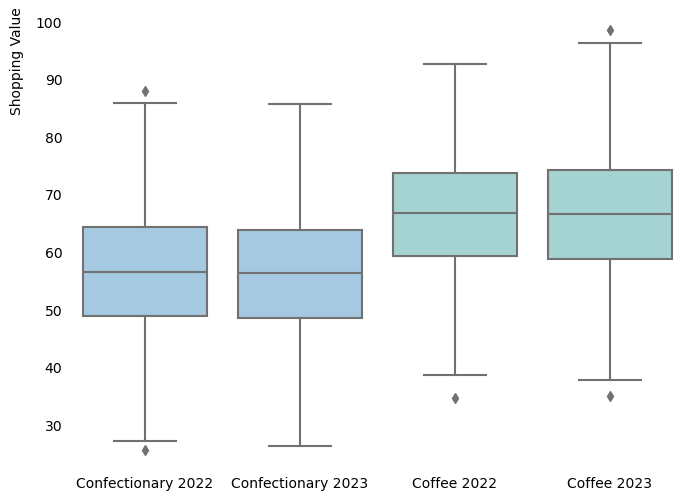

In [3]:
processor = DataProcessor('Data V1.xlsx')
descriptive = DescriptiveDetails(processor.df)
descriptive.create_boxplots()

In [168]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

class DescriptiveDetailsPlotly:
    def __init__(self, cleaned_data):
        self.df = cleaned_data

    def extract_columns(self):
        confectionary_2022 = self.df['Confectionary Shopping Value 2022']
        confectionary_2023 = self.df['Confectionary Shopping Value 2023']
        coffee_2022 = self.df['Coffee Shopping Value 2022']
        coffee_2023 = self.df['Coffee Shopping Value 2023']
        
        plot_data = pd.DataFrame({
            'Confectionary 2022': confectionary_2022,
            'Confectionary 2023': confectionary_2023,
            'Coffee 2022': coffee_2022,
            'Coffee 2023': coffee_2023
        })
        return plot_data

    def create_long_form_data(self, plot_data):
        long_form_data = pd.melt(plot_data.reset_index(), id_vars=['index'], value_vars=plot_data.columns)
        long_form_data.columns = ['index', 'Category', 'Value']
        return long_form_data

    def create_boxplots(self):
        plot_data = self.extract_columns()
        long_form_data = self.create_long_form_data(plot_data)
        
        fig = px.box(long_form_data, x='Category', y='Value', 
                     color='Category',
                     color_discrete_map={
                         'Confectionary 2022': '#9bcbeb',
                         'Confectionary 2023': '#9bcbeb',
                         'Coffee 2022': '#9cdbd9',
                         'Coffee 2023': '#9cdbd9'
                     })

        annotations = []
        for category in plot_data.columns:
            category_data = plot_data[category]
            
            median = category_data.median()
            mean = category_data.mean()
            quantiles = category_data.quantile([0.25, 0.75])
            
            annotations.append(dict(
                x=category,
                y=median,
                xref="x",
                yref="y",
                text=f"Median: {median:.2f}",
                ax=0,
                ay=-8
            ))
            
            annotations.append(dict(
                x=category,
                y=mean,
                xref="x",
                yref="y",
                text=f"Mean: {mean:.2f}",
                ax=0,
                ay=8
            ))
            
            annotations.append(dict(
                x=category,
                y=quantiles.iloc[0],
                xref="x",
                yref="y",
                text=f"Q1: {quantiles.iloc[0]:.2f}",
                ax=0,
                ay=15
            ))
            
            annotations.append(dict(
                x=category,
                y=quantiles.iloc[1],
                xref="x",
                yref="y",
                text=f"Q3: {quantiles.iloc[1]:.2f}",
                ax=100,
                ay=-15
            ))

        fig.update_layout(
            yaxis_title='Shopping Value',
            xaxis_title=None,
            showlegend=False,
            plot_bgcolor='white',
            yaxis=dict(
                showline=False,
                showgrid=True,
                zeroline=False,
                title=dict(
                    text='Shopping Value',
                    font=dict(size=14),  # Font size of the y-axis label
                    standoff=20  # Distance of the y-axis label from the axis
                ),
                automargin=True,  # Automatically adjust margins to fit the title
            ),
            xaxis=dict(
                showline=False,
                showgrid=False,
                zeroline=False,
                tickangle=0,
                tickmode='array',  # Specify tick mode as 'array'
                tickvals=[0, 1, 2, 3],  # Specify the positions of the ticks
                ticktext=['Confectionary 2022', 'Confectionary 2023', 'Coffee 2022', 'Coffee 2023'],
                automargin=False  # Automatically adjust margins to fit the title
            ),
            width=700,  # Set figure width
            height=600,  # Set figure height
            boxgap=0.1,  # Decrease the gap between box plots
            boxgroupgap=0.1,  # Decrease the gap between groups of box plots
            annotations= annotations
        )

        fig.update_xaxes(showticklabels=True, ticks="")
        fig.update_yaxes(showticklabels=True, ticks="")
        
        fig.show()

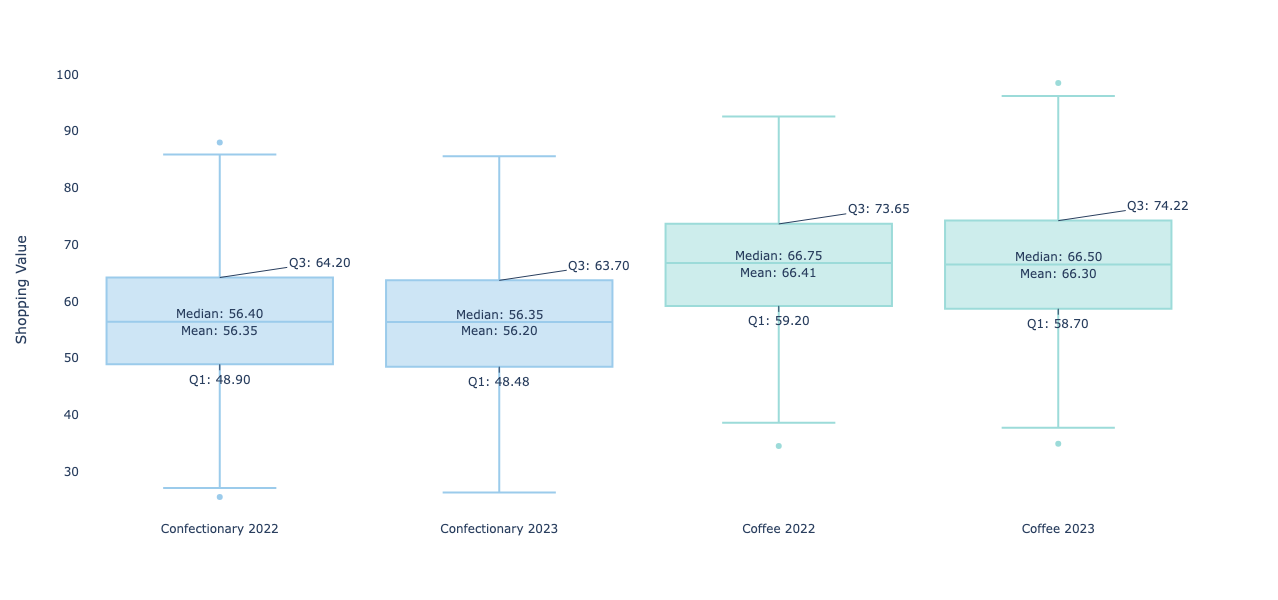

In [169]:
processor = DataProcessor('Data V1.xlsx')
descriptive = DescriptiveDetailsPlotly(processor.df)
descriptive.create_boxplots()

In [ ]:
# import plotly.graph_objs as go
# import plotly.offline as pyo
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde
# from plotly.subplots import make_subplots

# df = processor.df

# # Compute statistics
# def compute_stats(values):
#     return {
#         'mean': np.mean(values),
#         'median': np.median(values),
#         'percentile_25': np.percentile(values, 25),
#         'percentile_75': np.percentile(values, 75)
#     }

# stats_confectionary_2022 = compute_stats(df['Confectionary Shopping Value 2022'])
# stats_confectionary_2023 = compute_stats(df['Confectionary Shopping Value 2023'])
# stats_coffee_2022 = compute_stats(df['Coffee Shopping Value 2022'])
# stats_coffee_2023 = compute_stats(df['Coffee Shopping Value 2023'])

# # Create subplots
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Confectionary Shopping", "Coffee Shopping"))

# # Confectionary Shopping Histograms and KDEs
# trace1 = go.Histogram(
#     x=df['Confectionary Shopping Value 2022'],
#     opacity=0.5,
#     name='Confectionary 2022',
#     marker=dict(color='lightskyblue'),
#     histnorm='probability density'
# )

# trace2 = go.Histogram(
#     x=df['Confectionary Shopping Value 2023'],
#     opacity=0.5,
#     name='Confectionary 2023',
#     marker=dict(color='lightgreen'),
#     histnorm='probability density'
# )

# kde_confectionary_2022 = gaussian_kde(df['Confectionary Shopping Value 2022'])
# x_confectionary_2022 = np.linspace(df['Confectionary Shopping Value 2022'].min(), df['Confectionary Shopping Value 2022'].max(), 1000)
# y_confectionary_2022 = kde_confectionary_2022(x_confectionary_2022)

# trace3 = go.Scatter(
#     x=x_confectionary_2022,
#     y=y_confectionary_2022,
#     mode='lines',
#     name='KDE Confectionary 2022',
#     line=dict(color='blue')
# )

# kde_confectionary_2023 = gaussian_kde(df['Confectionary Shopping Value 2023'])
# x_confectionary_2023 = np.linspace(df['Confectionary Shopping Value 2023'].min(), df['Confectionary Shopping Value 2023'].max(), 1000)
# y_confectionary_2023 = kde_confectionary_2023(x_confectionary_2023)

# trace4 = go.Scatter(
#     x=x_confectionary_2023,
#     y=y_confectionary_2023,
#     mode='lines',
#     name='KDE Confectionary 2023',
#     line=dict(color='green')
# )

# # Coffee Shopping Histograms and KDEs
# trace5 = go.Histogram(
#     x=df['Coffee Shopping Value 2022'],
#     opacity=0.5,
#     name='Coffee 2022',
#     marker=dict(color='orange'),
#     histnorm='probability density'
# )

# trace6 = go.Histogram(
#     x=df['Coffee Shopping Value 2023'],
#     opacity=0.5,
#     name='Coffee 2023',
#     marker=dict(color='purple'),
#     histnorm='probability density'
# )

# kde_coffee_2022 = gaussian_kde(df['Coffee Shopping Value 2022'])
# x_coffee_2022 = np.linspace(df['Coffee Shopping Value 2022'].min(), df['Coffee Shopping Value 2022'].max(), 1000)
# y_coffee_2022 = kde_coffee_2022(x_coffee_2022)

# trace7 = go.Scatter(
#     x=x_coffee_2022,
#     y=y_coffee_2022,
#     mode='lines',
#     name='KDE Coffee 2022',
#     line=dict(color='red')
# )

# kde_coffee_2023 = gaussian_kde(df['Coffee Shopping Value 2023'])
# x_coffee_2023 = np.linspace(df['Coffee Shopping Value 2023'].min(), df['Coffee Shopping Value 2023'].max(), 1000)
# y_coffee_2023 = kde_coffee_2023(x_coffee_2023)

# trace8 = go.Scatter(
#     x=x_coffee_2023,
#     y=y_coffee_2023,
#     mode='lines',
#     name='KDE Coffee 2023',
#     line=dict(color='brown')
# )

# # Add traces to subplots
# fig.add_trace(trace1, row=1, col=1)
# fig.add_trace(trace2, row=1, col=1)
# fig.add_trace(trace3, row=1, col=1)
# fig.add_trace(trace4, row=1, col=1)
# fig.add_trace(trace5, row=1, col=2)
# fig.add_trace(trace6, row=1, col=2)
# fig.add_trace(trace7, row=1, col=2)
# fig.add_trace(trace8, row=1, col=2)

# # Annotations for Confectionary Shopping
# annotations_confectionary = [
#     dict(
#         xref='paper', yref='paper', x=0.5, y=1,
#         text=f'Mean 2022: {stats_confectionary_2022["mean"]:.2f}<br>Median 2022: {stats_confectionary_2022["median"]:.2f}<br>25th Percentile 2022: {stats_confectionary_2022["percentile_25"]:.2f}<br>75th Percentile 2022: {stats_confectionary_2022["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='blue'), align='left'
#     ),
#     dict(
#         xref='paper', yref='paper', x=0.5, y=0.9,
#         text=f'Mean 2023: {stats_confectionary_2023["mean"]:.2f}<br>Median 2023: {stats_confectionary_2023["median"]:.2f}<br>25th Percentile 2023: {stats_confectionary_2023["percentile_25"]:.2f}<br>75th Percentile 2023: {stats_confectionary_2023["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='green'), align='left'
#     )
# ]

# # Annotations for Coffee Shopping
# annotations_coffee = [
#     dict(
#         xref='paper', yref='paper', x=1.5, y=1,
#         text=f'Mean 2022: {stats_coffee_2022["mean"]:.2f}<br>Median 2022: {stats_coffee_2022["median"]:.2f}<br>25th Percentile 2022: {stats_coffee_2022["percentile_25"]:.2f}<br>75th Percentile 2022: {stats_coffee_2022["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='orange'), align='left'
#     ),
#     dict(
#         xref='paper', yref='paper', x=1.5, y=0.9,
#         text=f'Mean 2023: {stats_coffee_2023["mean"]:.2f}<br>Median 2023: {stats_coffee_2023["median"]:.2f}<br>25th Percentile 2023: {stats_coffee_2023["percentile_25"]:.2f}<br>75th Percentile 2023: {stats_coffee_2023["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='purple'), align='left'
#     )
# ]

# # Update layout
# fig.update_layout(
#     title='Overlapping Histograms with KDE and Statistics for Confectionary and Coffee Shopping',
#     width=1200,
#     height=600,
#     annotations=annotations_confectionary + annotations_coffee
# )

# # Show the plot
# pyo.iplot(fig)

In [3]:
# import plotly.graph_objs as go
# import plotly.offline as pyo
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde


# df = processor.df

# # Compute statistics
# mean_2022 = df['Confectionary Shopping Value 2022'].mean()
# median_2022 = df['Confectionary Shopping Value 2022'].median()
# percentile_2022_25 = np.percentile(df['Confectionary Shopping Value 2022'], 25)
# percentile_2022_75 = np.percentile(df['Confectionary Shopping Value 2022'], 75)

# mean_2023 = df['Confectionary Shopping Value 2023'].mean()
# median_2023 = df['Confectionary Shopping Value 2023'].median()
# percentile_2023_25 = np.percentile(df['Confectionary Shopping Value 2023'], 25)
# percentile_2023_75 = np.percentile(df['Confectionary Shopping Value 2023'], 75)

# # Create histograms
# trace1 = go.Histogram(
#     x=df['Confectionary Shopping Value 2022'],
#     opacity=0.5,  # Adjusted opacity for transparency
#     name='Confectionary Shopping Value 2022',
#     marker=dict(color='lightskyblue'),
#     histnorm='probability density'
# )

# trace2 = go.Histogram(
#     x=df['Confectionary Shopping Value 2023'],
#     opacity=0.5,  # Adjusted opacity for transparency
#     name='Confectionary Shopping Value 2023',
#     marker=dict(color='lightgreen'),
#     histnorm='probability density'
# )

# # KDE for 2022
# kde_2022 = gaussian_kde(df['Confectionary Shopping Value 2022'])
# x_2022 = np.linspace(df['Confectionary Shopping Value 2022'].min(), df['Confectionary Shopping Value 2022'].max(), 1000)
# y_2022 = kde_2022(x_2022)

# trace3 = go.Scatter(
#     x=x_2022,
#     y=y_2022,
#     mode='lines',
#     name='KDE 2022',
#     line=dict(color='blue')
# )

# # KDE for 2023
# kde_2023 = gaussian_kde(df['Confectionary Shopping Value 2023'])
# x_2023 = np.linspace(df['Confectionary Shopping Value 2023'].min(), df['Confectionary Shopping Value 2023'].max(), 1000)
# y_2023 = kde_2023(x_2023)

# trace4 = go.Scatter(
#     x=x_2023,
#     y=y_2023,
#     mode='lines',
#     name='KDE 2023',
#     line=dict(color='green')
# )

# # Annotations
# annotations = [
#     dict(
#         xref='paper', yref='paper', x=1.05, y=1,
#         text=f'Mean 2022: {mean_2022:.2f}<br>Median 2022: {median_2022:.2f}<br>25th Percentile 2022: {percentile_2022_25:.2f}<br>75th Percentile 2022: {percentile_2022_75:.2f}',
#         showarrow=False, font=dict(color='blue'), align='left'
#     ),
#     dict(
#         xref='paper', yref='paper', x=1.05, y=0.5,
#         text=f'Mean 2023: {mean_2023:.2f}<br>Median 2023: {median_2023:.2f}<br>25th Percentile 2023: {percentile_2023_25:.2f}<br>75th Percentile 2023: {percentile_2023_75:.2f}',
#         showarrow=False, font=dict(color='green'), align='left'
#     )
# ]

# # Combine the histograms and KDE lines
# data = [trace1, trace2, trace3, trace4]

# # Set the layout with specified width and height
# layout = go.Layout(
#     barmode='overlay',
#     title='Overlapping Histograms with KDE and Statistics',
#     xaxis=dict(title='Value'),
#     yaxis=dict(title='Density'),
#     width=800,  # Width of the figure
#     height=600,  # Height of the figure
#     annotations=annotations
# )

# fig = go.Figure(data=data, layout=layout)

# # Show the plot
# pyo.iplot(fig)

In [6]:
# import plotly.graph_objs as go
# import plotly.offline as pyo
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde
# from plotly.subplots import make_subplots

# df = processor.df

# # Compute statistics
# def compute_stats(values):
#     return {
#         'mean': np.mean(values),
#         'median': np.median(values),
#         'percentile_25': np.percentile(values, 25),
#         'percentile_75': np.percentile(values, 75)
#     }

# stats_confectionary_2022 = compute_stats(df['Confectionary Shopping Value 2022'])
# stats_confectionary_2023 = compute_stats(df['Confectionary Shopping Value 2023'])
# stats_coffee_2022 = compute_stats(df['Coffee Shopping Value 2022'])
# stats_coffee_2023 = compute_stats(df['Coffee Shopping Value 2023'])

# # Create subplots
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Confectionary Shopping", "Coffee Shopping"))

# # Confectionary Shopping Histograms and KDEs
# trace1 = go.Histogram(
#     x=df['Confectionary Shopping Value 2022'],
#     opacity=0.5,
#     name='Confectionary 2022',
#     marker=dict(color='lightskyblue'),
#     histnorm='probability density'
# )

# trace2 = go.Histogram(
#     x=df['Confectionary Shopping Value 2023'],
#     opacity=0.5,
#     name='Confectionary 2023',
#     marker=dict(color='lightgreen'),
#     histnorm='probability density'
# )

# kde_confectionary_2022 = gaussian_kde(df['Confectionary Shopping Value 2022'])
# x_confectionary_2022 = np.linspace(df['Confectionary Shopping Value 2022'].min(), df['Confectionary Shopping Value 2022'].max(), 1000)
# y_confectionary_2022 = kde_confectionary_2022(x_confectionary_2022)

# trace3 = go.Scatter(
#     x=x_confectionary_2022,
#     y=y_confectionary_2022,
#     mode='lines',
#     name='KDE Confectionary 2022',
#     line=dict(color='blue')
# )

# kde_confectionary_2023 = gaussian_kde(df['Confectionary Shopping Value 2023'])
# x_confectionary_2023 = np.linspace(df['Confectionary Shopping Value 2023'].min(), df['Confectionary Shopping Value 2023'].max(), 1000)
# y_confectionary_2023 = kde_confectionary_2023(x_confectionary_2023)

# trace4 = go.Scatter(
#     x=x_confectionary_2023,
#     y=y_confectionary_2023,
#     mode='lines',
#     name='KDE Confectionary 2023',
#     line=dict(color='green')
# )

# # Coffee Shopping Histograms and KDEs
# trace5 = go.Histogram(
#     x=df['Coffee Shopping Value 2022'],
#     opacity=0.5,
#     name='Coffee 2022',
#     marker=dict(color='orange'),
#     histnorm='probability density'
# )

# trace6 = go.Histogram(
#     x=df['Coffee Shopping Value 2023'],
#     opacity=0.5,
#     name='Coffee 2023',
#     marker=dict(color='purple'),
#     histnorm='probability density'
# )

# kde_coffee_2022 = gaussian_kde(df['Coffee Shopping Value 2022'])
# x_coffee_2022 = np.linspace(df['Coffee Shopping Value 2022'].min(), df['Coffee Shopping Value 2022'].max(), 1000)
# y_coffee_2022 = kde_coffee_2022(x_coffee_2022)

# trace7 = go.Scatter(
#     x=x_coffee_2022,
#     y=y_coffee_2022,
#     mode='lines',
#     name='KDE Coffee 2022',
#     line=dict(color='red')
# )

# kde_coffee_2023 = gaussian_kde(df['Coffee Shopping Value 2023'])
# x_coffee_2023 = np.linspace(df['Coffee Shopping Value 2023'].min(), df['Coffee Shopping Value 2023'].max(), 1000)
# y_coffee_2023 = kde_coffee_2023(x_coffee_2023)

# trace8 = go.Scatter(
#     x=x_coffee_2023,
#     y=y_coffee_2023,
#     mode='lines',
#     name='KDE Coffee 2023',
#     line=dict(color='brown')
# )

# # Add traces to subplots
# fig.add_trace(trace1, row=1, col=1)
# fig.add_trace(trace2, row=1, col=1)
# fig.add_trace(trace3, row=1, col=1)
# fig.add_trace(trace4, row=1, col=1)
# fig.add_trace(trace5, row=1, col=2)
# fig.add_trace(trace6, row=1, col=2)
# fig.add_trace(trace7, row=1, col=2)
# fig.add_trace(trace8, row=1, col=2)

# # Annotations for Confectionary Shopping
# annotations_confectionary = [
#     dict(
#         xref='paper', yref='paper', x=0.5, y=1,
#         text=f'Mean 2022: {stats_confectionary_2022["mean"]:.2f}<br>Median 2022: {stats_confectionary_2022["median"]:.2f}<br>25th Percentile 2022: {stats_confectionary_2022["percentile_25"]:.2f}<br>75th Percentile 2022: {stats_confectionary_2022["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='blue'), align='left'
#     ),
#     dict(
#         xref='paper', yref='paper', x=0.5, y=0.9,
#         text=f'Mean 2023: {stats_confectionary_2023["mean"]:.2f}<br>Median 2023: {stats_confectionary_2023["median"]:.2f}<br>25th Percentile 2023: {stats_confectionary_2023["percentile_25"]:.2f}<br>75th Percentile 2023: {stats_confectionary_2023["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='green'), align='left'
#     )
# ]

# # Annotations for Coffee Shopping
# annotations_coffee = [
#     dict(
#         xref='paper', yref='paper', x=1.5, y=1,
#         text=f'Mean 2022: {stats_coffee_2022["mean"]:.2f}<br>Median 2022: {stats_coffee_2022["median"]:.2f}<br>25th Percentile 2022: {stats_coffee_2022["percentile_25"]:.2f}<br>75th Percentile 2022: {stats_coffee_2022["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='orange'), align='left'
#     ),
#     dict(
#         xref='paper', yref='paper', x=1.5, y=0.9,
#         text=f'Mean 2023: {stats_coffee_2023["mean"]:.2f}<br>Median 2023: {stats_coffee_2023["median"]:.2f}<br>25th Percentile 2023: {stats_coffee_2023["percentile_25"]:.2f}<br>75th Percentile 2023: {stats_coffee_2023["percentile_75"]:.2f}',
#         showarrow=False, font=dict(color='purple'), align='left'
#     )
# ]

# # Update layout
# fig.update_layout(
#     width=1200,
#     height=600,
#     annotations=annotations_confectionary + annotations_coffee,
#     plot_bgcolor='white',  # Background color
#     paper_bgcolor='white',  # Paper color
#     xaxis=dict(showgrid=False),  # Remove x-axis grid lines
#     yaxis=dict(showgrid=False),  # Remove y-axis grid lines
#     xaxis2=dict(showgrid=False),  # Remove x-axis grid lines for second subplot
#     yaxis2=dict(showgrid=False)  # Remove y-axis grid lines for second subplot
# )

# # Show the plot
# pyo.iplot(fig)

In [9]:
# import plotly.graph_objs as go
# import plotly.offline as pyo
# import numpy as np
# import pandas as pd
# from scipy.stats import gaussian_kde
# from plotly.subplots import make_subplots

# # Assuming df is already loaded
# # df = processor.df

# # Compute statistics
# def compute_stats(values):
#     return {
#         'mean': np.mean(values),
#         'median': np.median(values),
#         'percentile_25': np.percentile(values, 25),
#         'percentile_75': np.percentile(values, 75)
#     }

# stats_confectionary_2022 = compute_stats(df['Confectionary Shopping Value 2022'])
# stats_confectionary_2023 = compute_stats(df['Confectionary Shopping Value 2023'])
# stats_coffee_2022 = compute_stats(df['Coffee Shopping Value 2022'])
# stats_coffee_2023 = compute_stats(df['Coffee Shopping Value 2023'])

# # Create subplots
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Confectionary Shopping", "Coffee Shopping"))

# # Confectionary Shopping Histograms and KDEs
# trace1 = go.Histogram(
#     x=df['Confectionary Shopping Value 2022'],
#     opacity=0.5,
#     name='Confectionary 2022',
#     marker=dict(color='#9bcbeb'),
#     histnorm='probability density'
# )

# trace2 = go.Histogram(
#     x=df['Confectionary Shopping Value 2023'],
#     opacity=0.5,
#     name='Confectionary 2023',
#     marker=dict(color='#0067a0'),
#     histnorm='probability density'
# )

# kde_confectionary_2022 = gaussian_kde(df['Confectionary Shopping Value 2022'])
# x_confectionary_2022 = np.linspace(df['Confectionary Shopping Value 2022'].min(), df['Confectionary Shopping Value 2022'].max(), 1000)
# y_confectionary_2022 = kde_confectionary_2022(x_confectionary_2022)

# trace3 = go.Scatter(
#     x=x_confectionary_2022,
#     y=y_confectionary_2022,
#     mode='lines',
#     name='KDE Confectionary 2022',
#     line=dict(color='#9bcbeb')
# )

# kde_confectionary_2023 = gaussian_kde(df['Confectionary Shopping Value 2023'])
# x_confectionary_2023 = np.linspace(df['Confectionary Shopping Value 2023'].min(), df['Confectionary Shopping Value 2023'].max(), 1000)
# y_confectionary_2023 = kde_confectionary_2023(x_confectionary_2023)

# trace4 = go.Scatter(
#     x=x_confectionary_2023,
#     y=y_confectionary_2023,
#     mode='lines',
#     name='KDE Confectionary 2023',
#     line=dict(color='#0067a0')
# )

# # Coffee Shopping Histograms and KDEs
# trace5 = go.Histogram(
#     x=df['Coffee Shopping Value 2022'],
#     opacity=0.5,
#     name='Coffee 2022',
#     marker=dict(color='#9cdbd9'),
#     histnorm='probability density'
# )

# trace6 = go.Histogram(
#     x=df['Coffee Shopping Value 2023'],
#     opacity=0.5,
#     name='Coffee 2023',
#     marker=dict(color='#007681'),
#     histnorm='probability density'
# )

# kde_coffee_2022 = gaussian_kde(df['Coffee Shopping Value 2022'])
# x_coffee_2022 = np.linspace(df['Coffee Shopping Value 2022'].min(), df['Coffee Shopping Value 2022'].max(), 1000)
# y_coffee_2022 = kde_coffee_2022(x_coffee_2022)

# trace7 = go.Scatter(
#     x=x_coffee_2022,
#     y=y_coffee_2022,
#     mode='lines',
#     name='KDE Coffee 2022',
#     line=dict(color='#9cdbd9')
# )

# kde_coffee_2023 = gaussian_kde(df['Coffee Shopping Value 2023'])
# x_coffee_2023 = np.linspace(df['Coffee Shopping Value 2023'].min(), df['Coffee Shopping Value 2023'].max(), 1000)
# y_coffee_2023 = kde_coffee_2023(x_coffee_2023)

# trace8 = go.Scatter(
#     x=x_coffee_2023,
#     y=y_coffee_2023,
#     mode='lines',
#     name='KDE Coffee 2023',
#     line=dict(color='#007681')
# )

# # Add traces to subplots
# fig.add_trace(trace1, row=1, col=1)
# fig.add_trace(trace2, row=1, col=1)
# fig.add_trace(trace3, row=1, col=1)
# fig.add_trace(trace4, row=1, col=1)
# fig.add_trace(trace5, row=1, col=2)
# fig.add_trace(trace6, row=1, col=2)
# fig.add_trace(trace7, row=1, col=2)
# fig.add_trace(trace8, row=1, col=2)

# # Update layout
# fig.update_layout(
#     width=1200,
#     height=600,
#     plot_bgcolor='white',  # Background color
#     paper_bgcolor='white',  # Paper color
#     xaxis=dict(showgrid=False),  # Remove x-axis grid lines
#     yaxis=dict(showgrid=False),  # Remove y-axis grid lines
#     xaxis2=dict(showgrid=False),  # Remove x-axis grid lines for second subplot
#     yaxis2=dict(showgrid=False)  # Remove y-axis grid lines for second subplot
# )

# # Update subplot titles
# fig.layout.annotations[0].update(x=0.06, y=1)  # Adjust position of the first subplot title
# fig.layout.annotations[1].update(x=0.58, y=1)  # Adjust position of the second subplot title

# # Show the plot
# pyo.iplot(fig)